This notebook is intended to plot data from CSmetrics as time series.

Goal 1: plot institutional influence overtime in a given area / venue (e.g. Microsoft vs CMU in PL, or ML)

In [36]:
import os, sys
import pandas as pd
import numpy as np
import pickle
import json,csv
#from datetime import datetime 

%matplotlib inline 

In [75]:
#cur_conf = 'icml,nips'
cur_conf = 'pldi,oopsla'
conf_list = cur_conf.split(',')
cur_topoic = 'machine learning'
institution_list = 'microsoft,stanford university,carnegie mellon university,university of washington'
institution_list = institution_list.split(',')

# default year range
year_range = [i for i in range(2007,2017)]
print(year_range)

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [76]:
data_dir = '../scores/'
cur_path = '../app/'

# read topic-venue mapping
FILE_CATEGORY = os.path.join(cur_path, "data/venue_category.csv")
## TODO

df_cite = pd.DataFrame(data=None, index=year_range)
df_pub = pd.DataFrame(data=None, index=year_range)

for c in conf_list:
    #tmp_cite = pd.DataFrame(data=None, index=year_range)
    #tmp_pub = pd.DataFrame(data=None, index=year_range)

    # read info on the designated conference(s) into a dataframe
    for y in year_range:# year_range:
        # file names look like icml_2007_affiliations.json
        paper_file_name = os.path.join(data_dir, c+'_'+str(y)+'_affiliations.json')
        cflist = json.load(open(paper_file_name, "r"))

        """ data in json look like the following 
        "university of texas at austin": {
            "Citation Count": 987.0,
            "Geo Mean W Impact": 254933.031,
            "Geo Mean Score": 136.953,
            "Arith Mean Score": 329.682,
            "Publication Count": 3.667
      },
        """
        for k,v in cflist.items():
            if k not in df_cite:
                df_cite[k] = 0
                df_pub[k] = 0
            df_cite.ix[y, k] += v['Citation Count']
            df_pub.ix[y, k] += v['Publication Count']
        #print (cflist, len(cflist), cflist['cornell university'])

df_cite.shape, df_pub.shape


((10, 275), (10, 275))

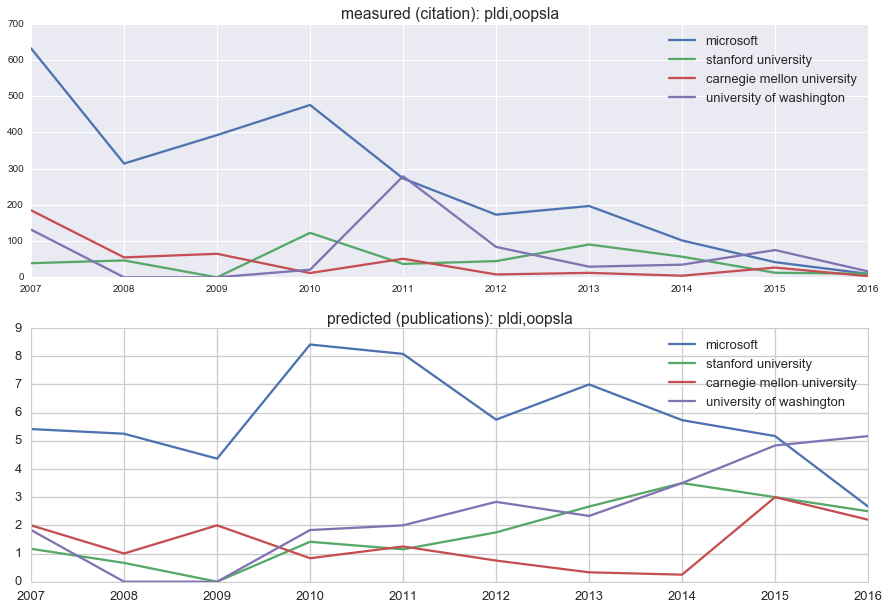

In [77]:
# plot this for a given list of institutions
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
clrs = sns.color_palette("muted")

num_lines = len(institution_list)
#df_cite.ix[institution_list,:].plot(kind='line') #color=clrs[:num_lines]

plt.figure(figsize=(15, 10))

ax1 = plt.subplot(2, 1, 1)
sns.set_context("talk", font_scale=1.)
sns.set_style("whitegrid")

#print(np.array(df_cite.ix[:, institution_list]))
ax1.plot(year_range, np.array(df_cite.ix[:, institution_list]))
ax1.set_xticklabels([str(y) for y in year_range])
ax1.legend(institution_list)
ax1.set_title("measured (citation): "+ cur_conf)

ax2 = plt.subplot(2, 1, 2)
sns.set_context("talk", font_scale=1.)
sns.set_style("whitegrid")

ax2.plot(year_range, np.array(df_pub.ix[:, institution_list]))
ax2.set_xticklabels([str(y) for y in year_range])
ax2.legend(institution_list)
ax2.set_title("predicted (publications): "+ cur_conf)

In [23]:
df_cite.ix[['microsoft','carnegie mellon university'],:]

,university college london,siemens,google,aalborg university,princeton university,peking university,university of minnesota,university of california san francisco,courant institute of mathematical sciences,ecole normale superieure,...,university of electro communications,university of aveiro,technische universitat darmstadt,paris dauphine university,university of perugia,lancaster university,urban ministries,university of central florida,university of patras,lehigh university
microsoft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carnegie mellon university,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df_cite = df_cite[['google', 'microsoft']] + tmp_cite[['google', 'microsoft']] 

In [68]:
df_cite['cmu'] = 0
df_cite

,google,microsoft,cmu
2007,873.000,815.334,0
2008,223.000,441.966,0
2009,782.000,907.000,0
2010,521.666,551.666,0
2011,167.100,1073.134,0
2012,6434.000,540.534,0
2013,6298.000,329.666,0
2014,2889.000,530.000,0
2015,1774.666,1118.834,0
2016,209.234,185.500,0


In [60]:
df0 = pd.DataFrame(data=None, index=[0, 1, 2])
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]})
df0 + df

,AAA,BBB,CCC
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
